In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base= automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

datetime.datetime(2017, 8, 23, 0, 0)

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [23]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_ago).\
    order_by(measurement.date).all()

In [25]:
# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df = pd.DataFrame(precipitation_data,columns=['date', 'precipitation'])
climate_df['date'] =pd.to_datetime(climate_df.date)
climate_df.set_index('date', inplace=True)

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [27]:
# Sort the dataframe by date
climate_df = climate_df.sort_values(by='date',ascending=False)
climate_df

,precipitation
date,
2017-08-23,0.45
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-22,0.50
...,...
2016-08-23,NaN
2016-08-23,0.15
2016-08-23,1.79


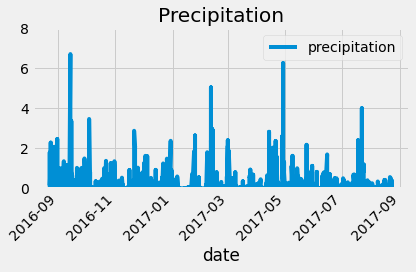

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data
climate_df = climate_df.dropna()
climate_df.plot()
plt.xticks(rotation=45)
plt.ylim(0,8)
plt.title("Precipitation Analysis")
plt.legend(loc='upper right')
plt.tight_layout()

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(measurement.station).distinct().count()
station_count

9

In [33]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]

lowest_highest_avg_temp = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()
lowest_highest_avg_temp


[(54.0, 85.0, 71.66378066378067)]

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.tobs).\
    filter(measurement.date >= one_year_ago).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

In [38]:
tobs_data_df = pd.DataFrame(tobs_data, columns=["TOBS"])
tobs_data_df

,TOBS
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


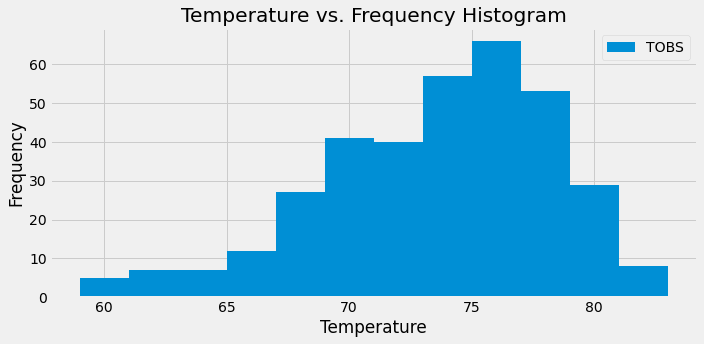

In [39]:
tobs_data_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram", figsize=(10,5))
plt.xlabel("Temperature")
plt.legend(loc="upper right")
plt.tight_layout()


# Close session

In [40]:
# Close Session
session.close()